# 4. Write a program for finding edges in an image using Gradient mask, Cross-gradient mask of size 2*2. Obtain sharpen image also.

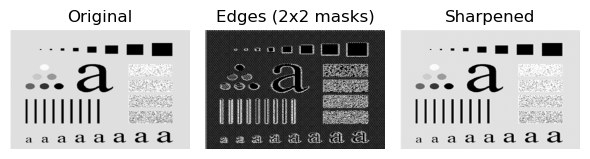

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_img(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Error: Unable to read image at {image_path}")
    return img

def gradient_edge_detection(image):
    Gx = np.array([[-1, 1],
                   [-1, 1]], dtype=np.float32)
    
    Gy = np.array([[-1, -1],
                   [1,  1]], dtype=np.float32)
    
    Gxy1 = np.array([[0, -1],
                     [1,  0]], dtype=np.float32)

    Gxy2 = np.array([[-1, 0],
                     [0,  1]], dtype=np.float32)

    edge_x = cv2.filter2D(image, -1, Gx)
    edge_y = cv2.filter2D(image, -1, Gy)
    edge_xy1 = cv2.filter2D(image, -1, Gxy1)
    edge_xy2 = cv2.filter2D(image, -1, Gxy2)

    edges = np.sqrt(edge_x**2 + edge_y**2 + edge_xy1**2 + edge_xy2**2)
    edges = np.clip(edges, 0, 255).astype(np.uint8)

    return edges

def sharpen_image(image, edges, alpha=1.0):
    sharpened = cv2.addWeighted(image, 1.0, edges, alpha, 0)
    return sharpened

def plot_results(original, edges, sharpened):
    plt.figure(figsize=(6, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Edges (2x2 masks)")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sharpened, cmap='gray')
    plt.title("Sharpened")
    plt.axis('off')

    plt.tight_layout()
    plt.savefig("outimg_problem4.png")
    plt.show()
    

def main():
    img_path = "../test_imgs/test_img.png"
    img = read_img(img_path)

    edges = gradient_edge_detection(img)
    sharpened = sharpen_image(img, edges)

    plot_results(img, edges, sharpened)

if __name__ == "__main__":
    main()
